In [1]:
import numpy as np
import pandas as pd
from numpy import percentile
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

# Import models
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.auto_encoder import AutoEncoder

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# Read data
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

train_df.head(n = 10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,Class
0,0.174300,0.438155,0.547325,0.783455,0.601152,0.736633,0.681003,0.741911,0.372806,0.700684,...,0.695744,0.799828,0.254200,0.749898,0.348312,0.760369,0.565051,0.692646,0.447460,0
1,0.156955,0.358103,0.547735,0.677705,0.653315,0.722129,0.755436,0.652081,0.356663,0.772700,...,0.700128,0.802984,0.259414,0.753954,0.344995,0.760152,0.566844,0.691325,0.447240,0
2,0.206479,0.318427,0.595435,0.672403,0.510233,0.628544,0.814642,0.717716,0.337463,0.747410,...,0.689706,0.797781,0.259913,0.749943,0.334245,0.760525,0.570651,0.694160,0.441232,0
3,0.206952,0.253134,0.604520,0.693263,0.739025,0.695075,0.834528,0.789217,0.484926,0.772054,...,0.692374,0.807418,0.255336,0.755779,0.348453,0.758146,0.565209,0.690263,0.447167,0
4,0.136466,0.408872,0.510549,0.594633,0.680964,0.783063,0.687105,0.753106,0.371015,0.723868,...,0.696328,0.793342,0.255085,0.745760,0.349749,0.759487,0.564032,0.688605,0.443426,0
5,0.178867,0.363534,0.524845,0.728855,0.664358,0.741353,0.768078,0.668502,0.377197,0.754942,...,0.699814,0.802320,0.260141,0.751566,0.349587,0.758069,0.563409,0.691178,0.444299,0
6,0.210274,0.321157,0.570672,0.766058,0.699094,0.720574,0.693440,0.785317,0.289751,0.672887,...,0.698299,0.803387,0.257347,0.755790,0.348185,0.758954,0.565640,0.691231,0.448155,0
7,0.197192,0.310334,0.613719,0.597931,0.641240,0.781124,0.726739,0.743711,0.348446,0.688820,...,0.686903,0.728841,0.254601,0.768735,0.345064,0.757771,0.590785,0.710533,0.453812,0
8,0.176528,0.577205,0.579736,0.720139,0.722761,0.783200,0.722769,0.759319,0.371768,0.733225,...,0.679060,0.818714,0.264012,0.769819,0.357536,0.758204,0.569335,0.690559,0.444497,0
9,0.155302,0.346704,0.570088,0.643262,0.692345,0.765478,0.750324,0.680026,0.419183,0.744963,...,0.700794,0.799594,0.260547,0.749513,0.351720,0.757825,0.563824,0.691262,0.444001,0


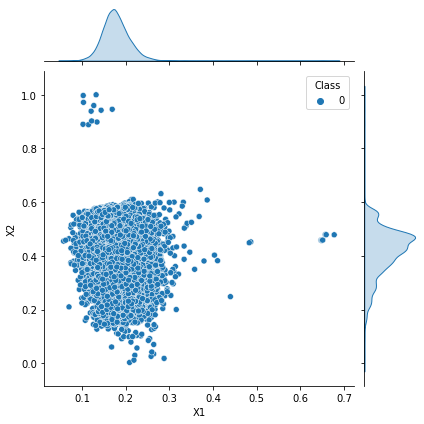

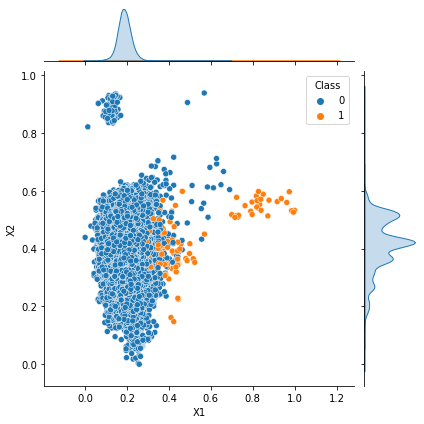

In [3]:
# Prepare train data with ony normal events and test data with all events
train_data_normals = train_df[train_df.Class == 0]
train_data_normals = train_data_normals.sample(n=len(train_data_normals) // 5, random_state=42, axis='index')

# Scatter plot of 2 features
sns.jointplot(data = train_data_normals, x="X1", y="X2", hue = "Class", kind='scatter')
sns.jointplot(data = test_df, x="X1", y="X2", hue = "Class", kind='scatter')

train_data_normals = train_data_normals.drop(['Class'], 1)

In [4]:
train_data_normals = train_data_normals.iloc[:,[0,1]]
test_df = test_df.iloc[:,[0,1,30]]

X_train = train_data_normals.values
X_test = test_df[test_df.Class == 0].values
X_test = X_test[np.random.choice(X_test.shape[0], X_test.shape[0]//500, replace=False), :]
X_outliers = test_df[test_df.Class == 1].values
X_outliers = X_outliers[np.random.choice(X_outliers.shape[0], X_outliers.shape[0]//10, replace=False), :]

In [5]:
# Define models
random_state = np.random.RandomState(42)
outlier_fraction=0.001
# Define three outlier detection methods to be compared
methods = {
    'Isolation Forest': IForest(n_estimators=10,random_state=random_state, contamination=outlier_fraction),
    'One-class SVM (OCSVM)': OCSVM(nu=0.01, gamma = 0.1, contamination=outlier_fraction),
    'Local Outlier Factor (LOF)': LOF(n_neighbors=20, contamination=outlier_fraction),
    'Auto Encoder': AutoEncoder(hidden_neurons = [2], dropout_rate = 0.0, l2_regularizer = 0.0,
                               validation_size = 0.2, preprocessing = False, random_state = random_state, 
                                contamination=outlier_fraction, verbose=0)
}

# Show all detectors
for i, clf in enumerate(methods.keys()):
    print('Model', i + 1, clf)

Model 1 Isolation Forest
Model 2 One-class SVM (OCSVM)
Model 3 Local Outlier Factor (LOF)
Model 4 Auto Encoder


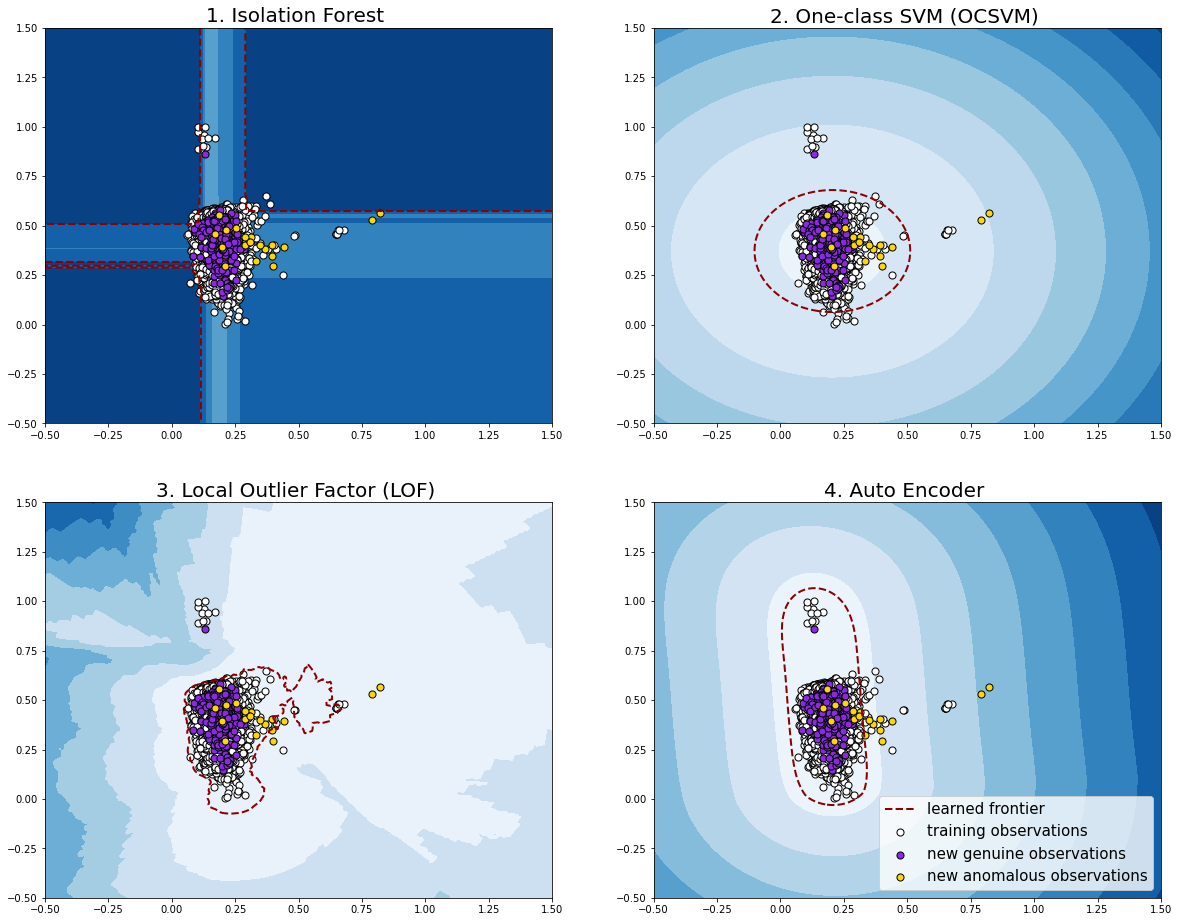

In [10]:
# Fit the models with the generated data and 
# compare model performances
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))

# Fit the model
plt.figure(figsize=(20, 16))
for i, (clf_name, clf) in enumerate(methods.items()):
    # fit the data and tag outliers
    clf.fit(X_train)
    scores_pred = clf.decision_function(X_train) * -1
    threshold = percentile(scores_pred, 100 * outlier_fraction)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test[:,0:2])
    y_pred_outliers = clf.predict(X_outliers[:,0:2])
    
    # plot the levels lines and the points
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    subplot = plt.subplot(2, 2, i + 1)
    subplot.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='darkred',linestyles='dashed')
    
    s = 50
    b1 = subplot.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
    b2 = subplot.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
    c = subplot.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')

    subplot.axis('tight')
    subplot.set_title("%d. %s " % (i + 1, clf_name), fontsize=20)
    subplot.set_xlim((-0.5, 1.5))
    subplot.set_ylim((-0.5, 1.5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new genuine observations", "new anomalous observations"],
           loc="lower right",
           prop=matplotlib.font_manager.FontProperties(size=15))
plt.show()